#### After running main `<size>_<name>_<transform>_<channel>.ipynb` notebook, use this to regenerate plots as needed.

In [50]:
DATA_NAME = 'approx1e5-pastis-wavelet-green' # size-name-transform-channel
import git
from pathlib import Path
import os

ROOT_DIR = Path(git.Repo('.', search_parent_directories=True).working_tree_dir)
path_dict = dict(zip(['size', 'name', 'transform', 'channel'], DATA_NAME.split("-")))
CWD = os.path.join(ROOT_DIR, os.path.join("results", "case-studies", path_dict['name'], path_dict['transform'], path_dict['size'], path_dict['channel']))
assert CWD == os.getcwd()

os.chdir(os.path.join(ROOT_DIR, "utilities"))
from testing import * # If MATLAB is not installed, open utilities and set to False
from plotting import *
os.chdir(CWD)
np.random.seed(0)

GROUP = 'layer' if path_dict['transform'] == 'wavelet' else ('band' if path_dict['transform'] == 'fourier' else 'group')
master_df = pd.read_csv(os.path.join(CWD, "CSVs", "master_df.csv"), index_col=GROUP)
group_data_map = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}.pickle'))
group_total_samples = pd.read_pickle(os.path.join(ROOT_DIR, "transformed-data", f'{DATA_NAME}-size.pickle'))
GROUPS = sorted(master_df.index)
SAVE_FIGS = True
plots_path = os.path.join(ROOT_DIR, "poster", "plots")

In [2]:
''' Only need to run commented code once'''
cdfs_dir = os.path.join(ROOT_DIR, "results", "CDFs")
cdfs_list = [os.path.join(cdfs_dir, i) for i in os.listdir(cdfs_dir)]
all_cdfs = combine_pickles(cdfs_list[0])
for cdf_dir in cdfs_list[1:]:
    all_cdfs = all_cdfs | combine_pickles(cdf_dir)
    
all_cdfs_df = create_kurt_var_ksstat_df(all_cdfs)
coarse_cdf_df = all_cdfs_df[(np.round(all_cdfs_df['r'], 0) == all_cdfs_df['r']) & (np.round(all_cdfs_df['eta'], 0) == all_cdfs_df['eta'])]
var_values_dict = dict()
kurt_values_dict = dict()
all_cdfs_df.head()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:818: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2


,"(r,eta),cdf",r,eta,cdf,variance,kurtosis
0,"((0.02, -1.4), <scipy.interpolate._fitpack2.In...",0.02,-1.4,<scipy.interpolate._fitpack2.InterpolatedUniva...,9.618487e+69,1.391529e+25
1,"((0.02, -1.3), <scipy.interpolate._fitpack2.In...",0.02,-1.3,<scipy.interpolate._fitpack2.InterpolatedUniva...,3.821735e+74,8.172634e+21
2,"((0.02, -1.2), <scipy.interpolate._fitpack2.In...",0.02,-1.2,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.455488e+78,4.131785e+19
3,"((0.02, -1.1), <scipy.interpolate._fitpack2.In...",0.02,-1.1,<scipy.interpolate._fitpack2.InterpolatedUniva...,1.406735e+81,6.947275e+17
4,"((0.02, -1.0), <scipy.interpolate._fitpack2.In...",0.02,-1.0,<scipy.interpolate._fitpack2.InterpolatedUniva...,5.331443e+83,2.562075e+16


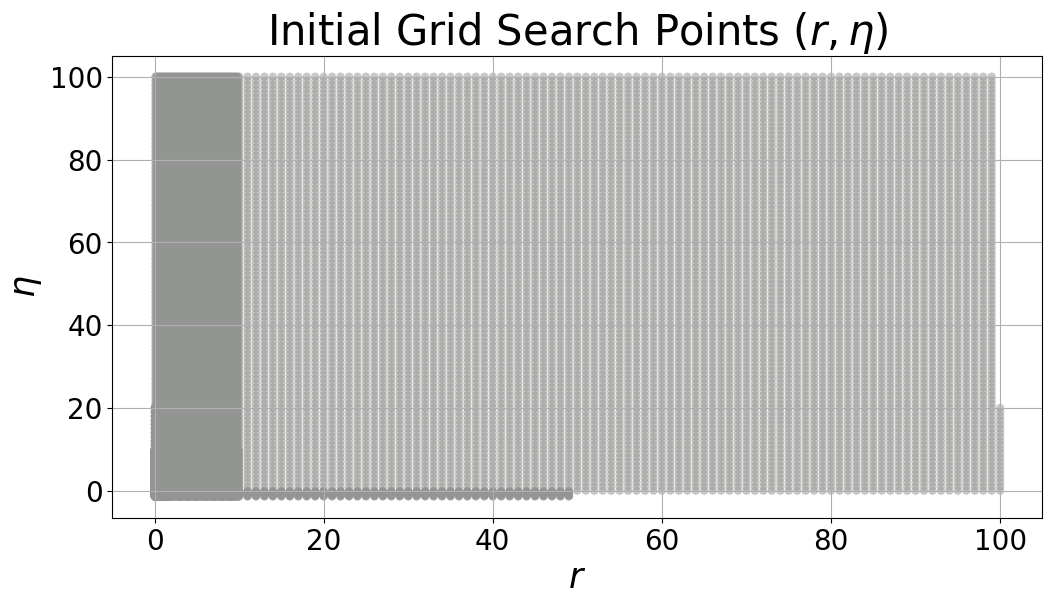

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))
df = all_cdfs_df
sns.scatterplot(x=df['r'], y=df['eta'], color='xkcd:gray', alpha=0.5, ax=ax, edgecolor='none')
ax.set_title(r'Initial Grid Search Points ($r, \eta$)', fontsize=30)

ax.tick_params(axis='both', which='major', labelsize=20)
ax.set_xlabel(r'$r$', fontsize=25)
ax.set_ylabel(r'$\eta$', fontsize=25)
plt.grid(which='both')
plt.show()

if SAVE_FIGS:
    fig.savefig(os.path.join(plots_path, "demo_initial_grid.jpg"), dpi=1000, bbox_inches='tight')

In [4]:
n_bootstrap = int(1e5)
bootstrap_size = int(1e4)
ci = 0.99
master_df

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,param_gaussian,kstest_stat_gaussian,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma
layer,,,,,,,,,,,,,,,,,,,,,
2,1829.164000,1651.372800,2019.902600,2.873299,1.840007,4.012415,3180.0,0.34,2.40,0.018359,...,35.389200,0.031293,3.861410e-03,32.846500,0.023339,6.160030e-02,26.705700,0.020186,1.477550e-01,2.674877e-01
3,577.966500,547.148500,610.217350,2.591534,2.004859,3.274253,12720.0,0.36,1.70,0.006825,...,20.485100,0.024938,2.641150e-07,18.002400,0.012832,3.007120e-02,14.353800,0.013594,1.799730e-02,8.724247e-01
4,161.064830,151.595140,170.843120,3.336077,2.644728,4.188527,50880.0,0.36,0.50,0.005365,...,10.065500,0.031150,2.514340e-43,8.851030,0.007245,9.536860e-03,7.208100,0.009629,1.587630e-04,2.320617e-01
5,37.128075,34.705720,39.643353,4.760657,3.808561,5.902313,203520.0,0.40,-0.06,0.002647,...,4.507130,0.034634,1.545600e-212,3.964490,0.007505,2.197220e-10,3.225400,0.010003,4.080280e-18,2.499790e-01
6,7.465013,6.910058,8.046522,6.556909,5.074348,8.726763,814080.0,0.48,-0.50,0.004682,...,1.822190,0.043074,0.000000e+00,1.596520,0.015329,1.336470e-166,1.289160,0.017422,4.447750e-215,6.646855e-12
7,1.416197,1.301939,1.538062,8.566812,6.601404,11.716293,3256320.0,0.77,-0.80,0.011405,...,0.704355,0.051999,0.000000e+00,0.618147,0.024411,0.000000e+00,0.494202,0.025216,0.000000e+00,0.000000e+00
8,0.229009,0.208696,0.252363,11.555227,7.821531,25.041437,13025280.0,2.00,-1.12,0.045556,...,0.261568,0.057127,0.000000e+00,0.229189,0.030158,0.000000e+00,0.179672,0.031616,0.000000e+00,0.000000e+00


In [5]:
rEtaKsstats_dict = pd.read_pickle(os.path.join(CWD, "cache", "rEtaKsstats_dict.pickle"))
group_cdf_df_dict = dict()
for group in master_df.index:
    group_cdf_df = pd.DataFrame(dict(zip(['r', 'eta', 'ksstat'], rEtaKsstats_dict[group])))
    group_cdf_df['variance'] = np.nan_to_num(group_cdf_df.apply(lambda row : variance_prior(row.loc['r'], row.loc['eta']), axis = 1))
    group_cdf_df['kurtosis'] = group_cdf_df.apply(lambda row : kurtosis_prior(row.loc['r'], row.loc['eta']), axis = 1)
    group_cdf_df = add_tests_to_df(cdfs_df=group_cdf_df, group=group, var_kurt_df=master_df, ksstats=group_cdf_df['ksstat']).sort_values(['r', 'eta'])
    group_cdf_df_dict[group] = group_cdf_df

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:818: RuntimeWarning: invalid value encountered in scalar divide
  var_prior = scale * scipy.special.gamma(beta + 1/r)/scipy.special.gamma(beta)
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: overflow encountered in scalar multiply
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: overflow encountered in scalar power
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:823: RuntimeWarning: invalid value encountered in scalar divide
  kurtosis = 3*scipy.special.gamma(beta + 2/r)*scipy.special.gamma(beta)/scipy.special.gamma(beta+1/r)**2
c:\Users\yashd\Desktop\

In [ ]:
legendsize = 12
fontsize = 15
starsize = 100
initial_param= (master_df.loc[group, 'initial_r'], master_df.loc[group, 'initial_eta'])
best_param= (master_df.loc[group, 'best_r'], master_df.loc[group, 'best_eta'])
fixed_palette = {
'Var': 'xkcd:dark yellow',
'Kstest': 'blue',
'Kurt': 'orange',
'KstestVar': 'cyan',
'KurtVar': 'red',
'KstestKurt': 'brown',
'KstestKurtVar': 'xkcd:shamrock green',
'': 'xkcd:medium gray'
}

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


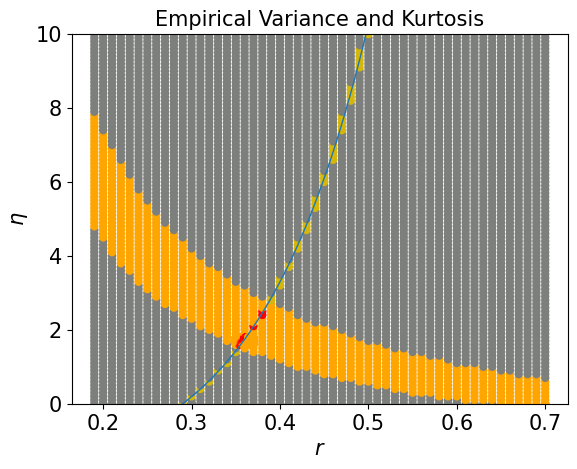

AttributeError: 'Axes' object has no attribute 'savefig'

In [53]:
df = group_cdf_df_dict[group].copy() 
cols = ['pass_var', 'pass_kurt']
extra_boundary_r, extra_boundary_eta = 0, 5
plot_name = f"Empirical Variance and Kurtosis"
target_var = master_df.loc[group, 'obs_var']
cols = sorted(cols)
group = 3 

for col in cols:
    df[col] = df[col].replace({True: col[5:], False: ''})
df['map'] = df.apply(lambda row : ''.join([row.loc[col].capitalize() +'' for col in cols]), axis = 1)
temp = df[(df['map'] != '') & (df['map'] != 'Kurt')]
df = df[(df['r'] >= temp['r'].min() - extra_boundary_r) & 
        (df['r'] <= temp['r'].max() + extra_boundary_r) &
        (df['eta'] >= temp['eta'].min() - extra_boundary_eta) & 
        (df['eta'] <= temp['eta'].max() + extra_boundary_eta)]

map_categories = df['map'].unique()
for m in map_categories:
    if m not in fixed_palette:
        fixed_palette[m] = get_random_color()
fig, ax = plt.subplots()
fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')
r_vals = []
eta_vals = []
if target_var:
    for r in np.linspace(0.1, df['r'].max() if df.shape[0] > 0 else 100, 1000):
        eta = find_eta_for_target_mean(r, target_var)
        if eta < df['eta'].min():
            continue
        if (eta > df['eta'].max()):
            break
        r_vals.append(r)
        eta_vals.append(eta)
    sns.lineplot(x=r_vals, y=eta_vals, label=f'target_var:{np.round(target_var, 4)}', linewidth=1, ax=ax)
    
ax.set_ylim((0, 10))
ax.tick_params(axis='both', which='major', labelsize=fontsize)
ax.set_xlabel(r'$r$', fontsize=fontsize)
ax.set_ylabel(r'$\eta$', fontsize=fontsize)
ax.legend(fontsize = legendsize).set_visible(False)
plt.title(plot_name, fontsize=fontsize)
plt.show()

if SAVE_FIGS:
    fig.savefig(os.path.join(plots_path, "demo_variance_kurtosis.jpg"), dpi=1000, bbox_inches='tight')

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


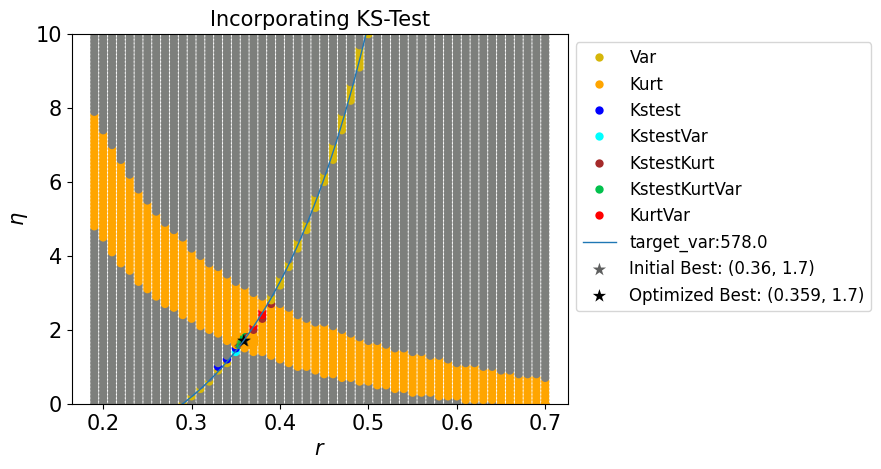

In [43]:
df = group_cdf_df_dict[group].copy() 
cols = ['pass_var', 'pass_kstest', 'pass_kurt']
extra_boundary_r, extra_boundary_eta = 0, 5
plot_name = f"Incorporating KS-Test"
target_var = master_df.loc[group, 'obs_var']
cols = sorted(cols)
group = 3 

for col in cols:
    df[col] = df[col].replace({True: col[5:], False: ''})
df['map'] = df.apply(lambda row : ''.join([row.loc[col].capitalize() +'' for col in cols]), axis = 1)
temp = df[(df['map'] != '') & (df['map'] != 'Kurt')]
df = df[(df['r'] >= temp['r'].min() - extra_boundary_r) & 
        (df['r'] <= temp['r'].max() + extra_boundary_r) &
        (df['eta'] >= temp['eta'].min() - extra_boundary_eta) & 
        (df['eta'] <= temp['eta'].max() + extra_boundary_eta)]

map_categories = df['map'].unique()
for m in map_categories:
    if m not in fixed_palette:
        fixed_palette[m] = get_random_color()
fig, ax = plt.subplots()
fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')
r_vals = []
eta_vals = []
if target_var:
    for r in np.linspace(0.1, df['r'].max() if df.shape[0] > 0 else 100, 1000):
        eta = find_eta_for_target_mean(r, target_var)
        if eta < df['eta'].min():
            continue
        if (eta > df['eta'].max()):
            break
        r_vals.append(r)
        eta_vals.append(eta)
    sns.lineplot(x=r_vals, y=eta_vals, label=f'target_var:{np.round(target_var)}', linewidth=1, ax=ax)
if initial_param is not None:
    sns.scatterplot(x = [initial_param[0]], y = [initial_param[1]], marker='*', s = starsize, c = 'xkcd:dark gray', ax=ax, label = f'Initial Best: {initial_param}', edgecolor='none', alpha=0.8)
    sns.scatterplot(x = [best_param[0]], y = [best_param[1]], marker='*', s = starsize, c = 'xkcd:black', ax=ax, label = f'Optimized Best: {best_param}', edgecolor='none')
    ax.set_ylim((0, 10))
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.set_xlabel(r'$r$', fontsize=fontsize)
    ax.set_ylabel(r'$\eta$', fontsize=fontsize)
ax.legend(fontsize = legendsize, bbox_to_anchor = (1, 1))
plt.title(plot_name, fontsize=fontsize)
plt.show()

c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\testing.py:842: RuntimeWarning: invalid value encountered in scalar divide
  return scipy.special.gamma((eta+2.5)/r) / scipy.special.gamma((eta+1.5)/r)


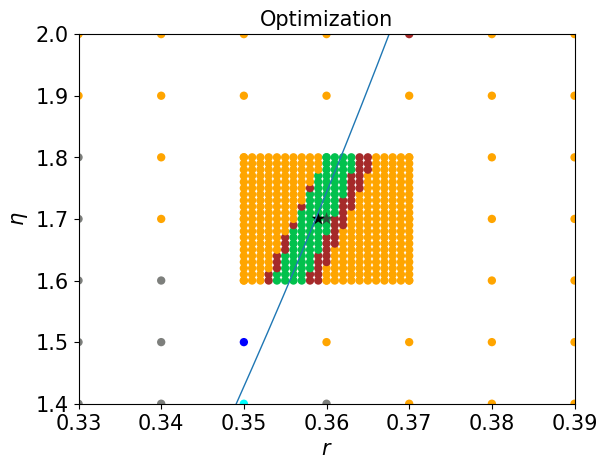

In [44]:
df = group_cdf_df_dict[group].copy() 
cols = ['pass_var', 'pass_kstest', 'pass_kurt']
extra_boundary_r, extra_boundary_eta = 0.03, 0.3
plot_name = f"Optimization"
target_var = master_df.loc[group, 'obs_var']
cols = sorted(cols)
group = 3 

for col in cols:
    df[col] = df[col].replace({True: col[5:], False: ''})
df['map'] = df.apply(lambda row : ''.join([row.loc[col].capitalize() +'' for col in cols]), axis = 1)
temp = df[(df['map'] != '') & (df['map'] != 'Kurt')]
df = df[(df['r'] >= temp['r'].min() - extra_boundary_r) & 
        (df['r'] <= temp['r'].max() + extra_boundary_r) &
        (df['eta'] >= temp['eta'].min() - extra_boundary_eta) & 
        (df['eta'] <= temp['eta'].max() + extra_boundary_eta)]

map_categories = df['map'].unique()
for m in map_categories:
    if m not in fixed_palette:
        fixed_palette[m] = get_random_color()
fig, ax = plt.subplots()
fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')
r_vals = []
eta_vals = []
if target_var:
    for r in np.linspace(0.1, df['r'].max() if df.shape[0] > 0 else 100, 1000):
        eta = find_eta_for_target_mean(r, target_var)
        if eta < df['eta'].min():
            continue
        if (eta > df['eta'].max()):
            break
        r_vals.append(r)
        eta_vals.append(eta)
    sns.lineplot(x=r_vals, y=eta_vals, label=f'target_var:{np.round(target_var, 4)}', linewidth=1, ax=ax)
if initial_param is not None:
    sns.scatterplot(x = [initial_param[0]], y = [initial_param[1]], marker='*', s = starsize, c = 'xkcd:dark gray', ax=ax, label = f'Initial Best: {initial_param}', edgecolor='none', alpha=0.8)
    sns.scatterplot(x = [best_param[0]], y = [best_param[1]], marker='*', s = starsize, c = 'xkcd:black', ax=ax, label = f'Optimized Best: {best_param}', edgecolor='none')
    
    ax.set_ylim((0, 10))
    ax.tick_params(axis='both', which='major', labelsize=fontsize)
    ax.set_xlabel(r'$r$', fontsize=fontsize)
    ax.set_ylabel(r'$\eta$', fontsize=fontsize)
    ax.set_xlim((master_df.loc[group, 'initial_r'] - extra_boundary_r, master_df.loc[group, 'initial_r'] + extra_boundary_r))
    ax.set_ylim((master_df.loc[group, 'initial_eta'] - extra_boundary_eta, master_df.loc[group, 'initial_eta'] + extra_boundary_eta))

ax.legend(fontsize = legendsize).set_visible(False)
plt.title(plot_name, fontsize=fontsize)
plt.show()

0.01 11.3 0.18999999999999995
0.001 0.6999999999999997 0.019999999999999962


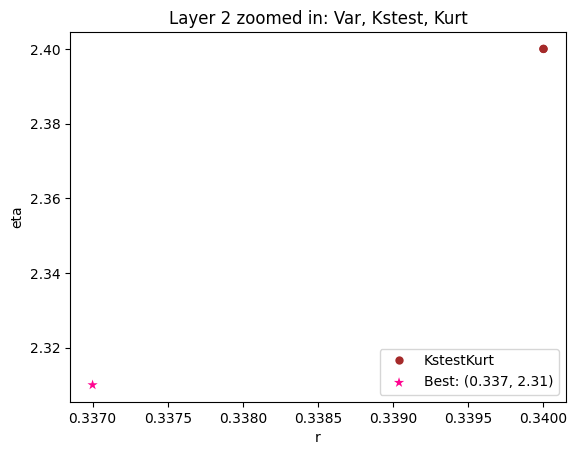

0.01 3.3 0.10999999999999999
0.001 0.18999999999999995 0.007000000000000006


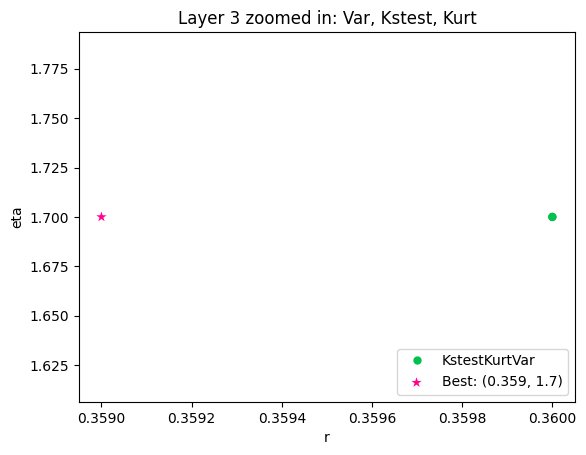

0.01 1.5 0.09999999999999998
0.001 0.08999999999999997 0.007000000000000006


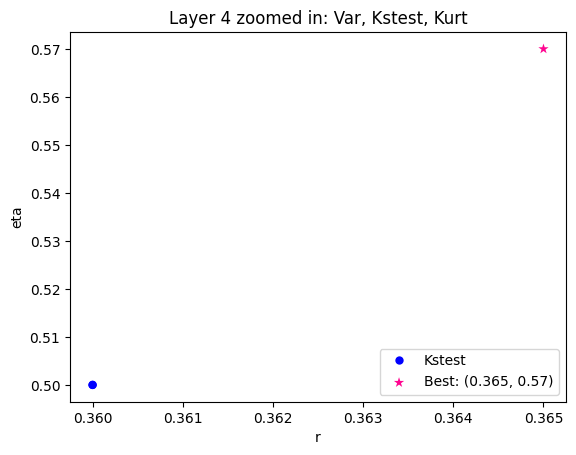

0.01 0.6000000000000001 0.07
0.001 0.016 0.07


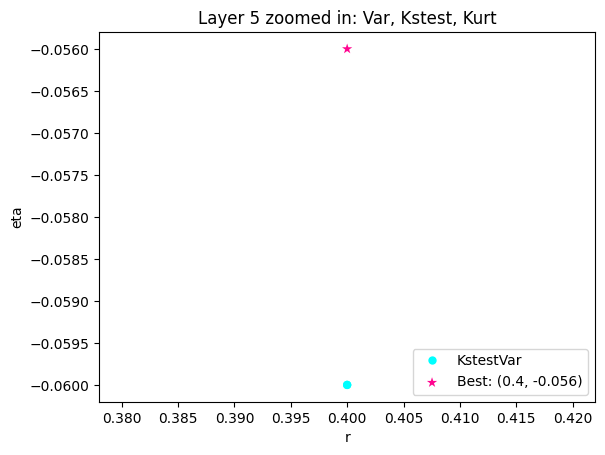

0.01 0.49999999999999994 0.15999999999999998
0.001 0.050000000000000044 0.020000000000000018


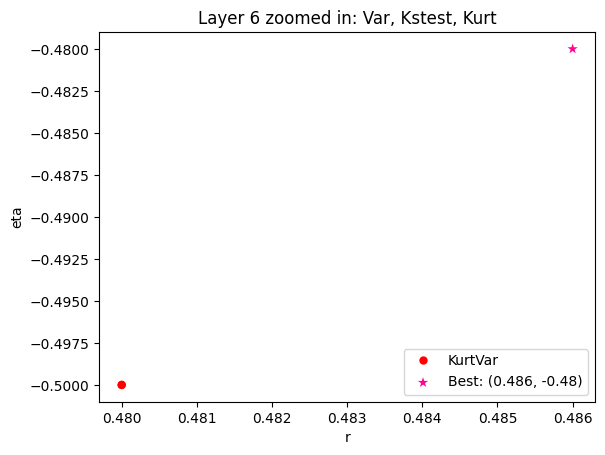

0.01 0.25 0.43999999999999995
0.001 0.020000000000000018 0.020000000000000018


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\plotting.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


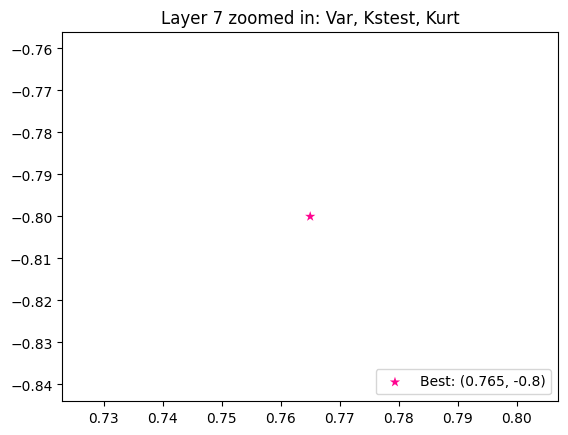

0.01 0.06999999999999984 8.3
0.001 0.009999999999999787 1.5999999999999999


c:\Users\yashd\Desktop\hierarchical-bayesian-model-validation\utilities\plotting.py:38: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  fig = sns.scatterplot(df, x='r', y='eta', hue='map', palette = fixed_palette, ax=ax, alpha=1, edgecolor='none')


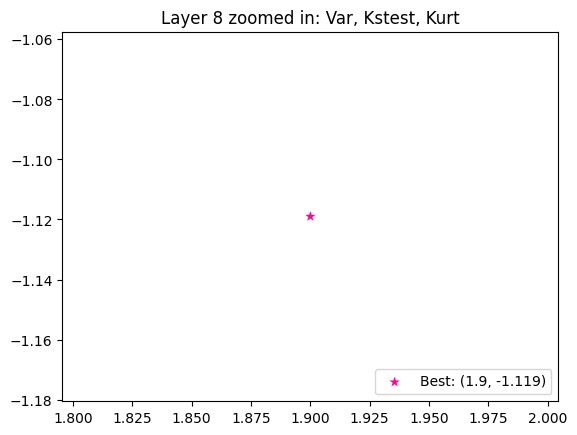

,obs_var,var_lower,var_upper,obs_kurt,kurt_lower,kurt_upper,total_samples,initial_r,initial_eta,kstest_stat_initial,...,kstest_pval_gaussian,param_laplace,kstest_stat_laplace,kstest_pval_laplace,param_t,kstest_stat_t,kstest_pval_t,kstest_pval_gengamma,delta_r_best,delta_eta_best
layer,,,,,,,,,,,,,,,,,,,,,
2,1829.164000,1651.372800,2019.902600,2.873299,1.840007,4.012415,3180.0,0.34,2.40,0.018359,...,3.861410e-03,32.846500,0.023339,6.160030e-02,26.705700,0.020186,1.477550e-01,2.674877e-01,0.020,0.700
3,577.966500,547.148500,610.217350,2.591534,2.004859,3.274253,12720.0,0.36,1.70,0.006825,...,2.641150e-07,18.002400,0.012832,3.007120e-02,14.353800,0.013594,1.799730e-02,8.724247e-01,0.007,0.190
4,161.064830,151.595140,170.843120,3.336077,2.644728,4.188527,50880.0,0.36,0.50,0.005365,...,2.514340e-43,8.851030,0.007245,9.536860e-03,7.208100,0.009629,1.587630e-04,2.320617e-01,0.007,0.090
5,37.128075,34.705720,39.643353,4.760657,3.808561,5.902313,203520.0,0.40,-0.06,0.002647,...,1.545600e-212,3.964490,0.007505,2.197220e-10,3.225400,0.010003,4.080280e-18,2.499790e-01,0.070,0.016
6,7.465013,6.910058,8.046522,6.556909,5.074348,8.726763,814080.0,0.48,-0.50,0.004682,...,0.000000e+00,1.596520,0.015329,1.336470e-166,1.289160,0.017422,4.447750e-215,6.646855e-12,0.020,0.050
7,1.416197,1.301939,1.538062,8.566812,6.601404,11.716293,3256320.0,0.77,-0.80,0.011405,...,0.000000e+00,0.618147,0.024411,0.000000e+00,0.494202,0.025216,0.000000e+00,0.000000e+00,0.020,0.020
8,0.229009,0.208696,0.252363,11.555227,7.821531,25.041437,13025280.0,2.00,-1.12,0.045556,...,0.000000e+00,0.229189,0.030158,0.000000e+00,0.179672,0.031616,0.000000e+00,0.000000e+00,1.600,0.010


In [5]:
for group in GROUPS: 
    temp_df = group_cdf_df_dict[group]
    eps = 0.5
    delta_rs = []
    delta_etas = []

    for eps in 10.**np.arange(-2, -4, -1):
        filtered_ksstat_df = temp_df[(temp_df['ksstat'] < temp_df['ksstat'].min() + eps)]
        if filtered_ksstat_df['r'].max() - filtered_ksstat_df['r'].min() > 0:
            delta_r = filtered_ksstat_df['r'].max() - filtered_ksstat_df['r'].min()
            delta_rs.append(delta_r)
        if filtered_ksstat_df['eta'].max() - filtered_ksstat_df['eta'].min() > 0:
            delta_eta = filtered_ksstat_df['eta'].max() - filtered_ksstat_df['eta'].min()
            delta_etas.append(delta_eta)
        print(eps, delta_eta, delta_r)
        #create_scatter_plot(filtered_ksstat_df, 'ksstat')
        
    master_df.loc[group, 'delta_r_best'] = delta_rs[-1]
    master_df.loc[group, 'delta_eta_best'] = delta_etas[-1]

    filtered_df = temp_df[(temp_df['r'] > master_df.loc[group, 'initial_r'] - eps) & 
                    (temp_df['r'] < master_df.loc[group, 'initial_r'] + eps) &
                    (temp_df['eta'] > master_df.loc[group, 'initial_eta'] - eps) &
                    (temp_df['eta'] < master_df.loc[group, 'initial_eta'] + eps)]
    
    cols = ['pass_var', 'pass_kstest', 'pass_kurt']
    fig = combo_test_plot(filtered_df, cols, 
                            plot_name=f"{GROUP.capitalize()} {group} zoomed in: {', '.join([col[5:].capitalize() for col in cols])}",
                            best_param=(master_df.loc[group, 'best_r'], master_df.loc[group, f'best_eta']))
    if SAVE_FIGS:
        fig.figure.savefig(os.path.join(CWD, "plots", f"optimized_full_grid_search_combo_plot_layer{group}.jpg"), bbox_inches = 'tight', dpi=600)

master_df

In [10]:
delta_etas

[101.45, 101.45, 101.45, 101.45, 101.45]

In [ ]:
for group in GROUPS:
    fig = visualize_cdf_pdf(sample = group_data_map[group], 
                    params = (master_df.loc[group]['best_r'], master_df.loc[group]['best_eta']), 
                    log_scale = True,
                    group = group,
                    interval = (-1000, 1000))
    if SAVE_FIGS:
        fig.savefig(os.path.join(CWD, "plots", f'compare_cdf_pdf_layer_{group}.jpg'), bbox_inches = 'tight', dpi = 600)